# Monte Carlo Simulations of Stock Price Dynamics using Geometric Brownian Motion 

## Monte Carlo Simulations of Stock Prices Using Geometric Brownian Motion

Monte Carlo simulations using Geometric Brownian Motion (GBM) are a popular method for modeling the future prices of stocks. This approach leverages the mathematical properties of GBM, which is a stochastic process often used to describe the random behavior of asset prices over time.

### Key Concepts

1. **Geometric Brownian Motion (GBM)**:
   GBM is a continuous-time stochastic process defined by the stochastic differential equation (SDE):

   $$
   \displaystyle dS_t = \mu S_t dt + \sigma S_t dW_t
   $$

   where:
   - \($ S_t $\) is the stock price at time \($ t $\).
   - \($ \mu $\) is the drift rate, representing the expected return of the stock.
   - \($ \sigma $\) is the volatility of the stock, indicating the degree of variation in the stock price.
   - \($ W_t $\) is a Wiener process or Brownian motion, representing the random component.

   The solution to this SDE gives the stock price at time \($ t $\) as:

   $$
   \displaystyle S_t = S_0 \exp\left\{\left(\mu - \frac{\sigma^2}{2}\right)t + \sigma W_t\right\}
   $$

   Here, \($ S_0 $\) is the initial stock price, and the term \($ \left(\mu - \frac{\sigma^2}{2}\right)t $\) accounts for the expected return adjusted for risk, while \($ \sigma W_t $\) represents the random fluctuations.

2. **Monte Carlo Simulation**:
   Monte Carlo simulation is a computational technique that uses random sampling to estimate the probability distribution of outcomes. In the context of stock prices, it involves generating a large number of possible future price paths using GBM.

### Steps to Perform a Monte Carlo Simulation

1. **Set Initial Parameters**:
   - Initial stock price (\($ S_0 $\))
   - Expected return (drift rate \($ \mu $\))
   - Volatility (\($ \sigma $\))
   - Time horizon (\($ T $\))
   - Number of time steps (\($ N $\))
   - Number of simulations (\($ M $\))

2. **Generate Random Variables**:
   For each time step and simulation, generate random numbers \($ Z_i $\) from a standard normal distribution. These will be used to simulate the Brownian motion component.

3. **Simulate Price Paths**:
   For each simulation, use the discrete version of the GBM equation:

   $$
   \displaystyle S_{t+\Delta t} = S_t \exp\left\{\left(\mu - \frac{\sigma^2}{2}\right)\Delta t + \sigma \sqrt{\Delta t} Z_i\right\}
   $$

   where \($ \Delta t = \frac{T}{N} $\) is the time increment.

4. **Repeat and Analyze**:
   - Repeat the above step for all simulations (\($ M $\)).
   - Analyze the results to get the distribution of the final stock prices, calculate expected values, or assess the probability of certain outcomes (e.g., the stock price being above a certain level).

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime
from sklearn.model_selection import train_test_split

C:\Users\andre\anaconda3\envs\env\Lib\site-packages\requests\__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


In [2]:
# Data Extraction
ticker = 'QQQ'
# start_date = datetime.datetime.now() - datetime.timedelta(days=365)
start_date = '2023-01-09'
end_date = datetime.date.today()

Selecting a start date that aligns with the onset of a strong long-term trend is generally advisable for capturing recent price movements effectively.  QQQ begun a strong bullish trend at the beginning of January 2023.

In [3]:
# pull data from yfinance
df = yf.download(ticker, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


Average Return: 0.14%


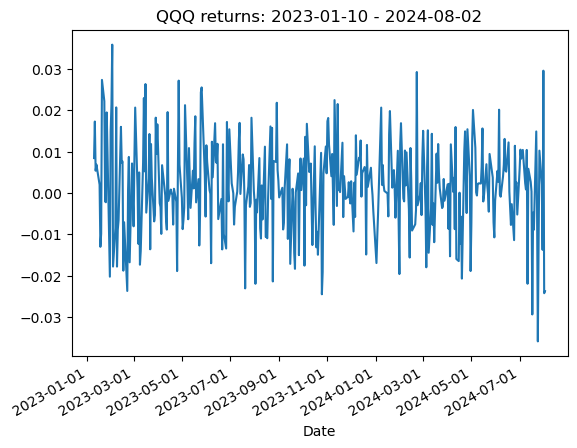

In [4]:
# Plot returns
adj_close = df['Adj Close']
returns = adj_close.pct_change().dropna()
print(f'Average Return: {100 * returns.mean():.2f}%')

returns.index = returns.index.normalize()

# Convert start and end dates to strings without time component
start_date_str = returns.index[0].strftime('%Y-%m-%d')
end_date_str = returns.index[-1].strftime('%Y-%m-%d')

returns.plot(title=f'{ticker} returns: {start_date_str} - {end_date_str}')

# Format the x-axis to show only the date
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))

# Rotate date labels for better readability
plt.gcf().autofmt_xdate()

plt.show()

In [5]:
train, test = train_test_split(returns, test_size = 0.5, shuffle = False)

In [6]:
T = len(test)
N = len(test)
S_0 = adj_close[train.index[-1]]
N_SIM = 1000
mu = train.mean()
sigma = train.std()

In [7]:
def simulate_gbm(s_0, mu, sigma, n_sims, T, N):
 dt = T/N
 dW = np.random.normal(scale = np.sqrt(dt),
 size=(n_sims, N))
 W = np.cumsum(dW, axis=1)
 time_step = np.linspace(dt, T, N)
 time_steps = np.broadcast_to(time_step, (n_sims, N))
 S_t = s_0 * np.exp((mu - 0.5 * sigma ** 2) * time_steps + sigma * W)
 S_t = np.insert(S_t, 0, s_0, axis=1)
 return S_t

In [8]:
gbm_simulations = simulate_gbm(S_0, mu, sigma, N_SIM, T, N)

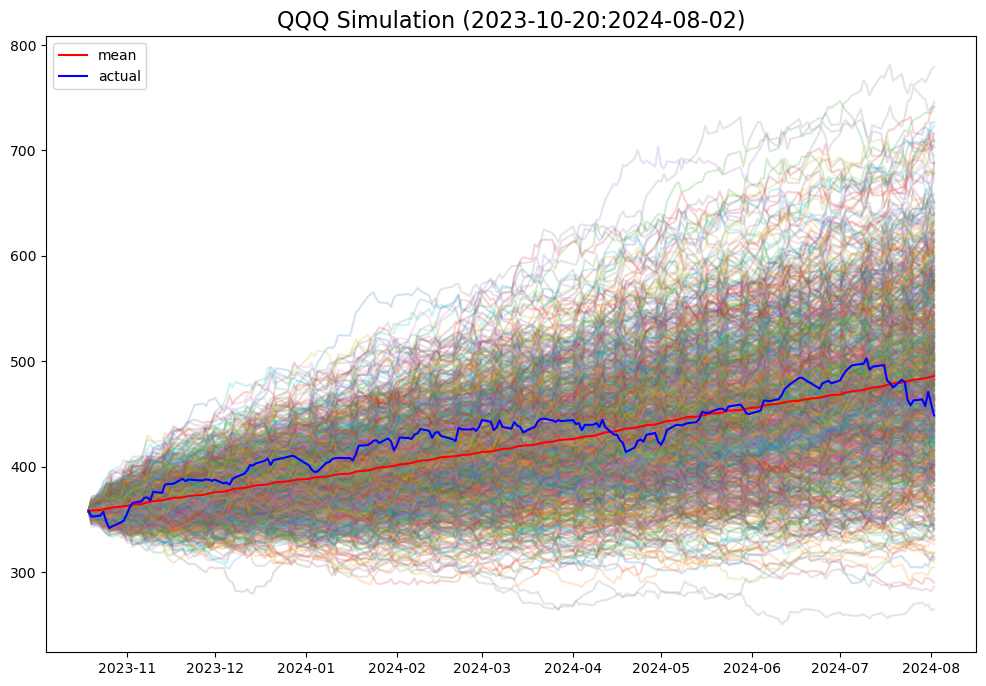

In [9]:
# Simulation dates
last_train_date = train.index[-1].date()
first_test_date = test.index[0].date()
last_test_date = test.index[-1].date()

# Title for the plot
plot_title = f'{ticker} Simulation ({first_test_date}:{last_test_date})'

# Selected indices for plotting
selected_indices = adj_close[last_train_date:last_test_date].index
index = [date.date() for date in selected_indices]

# Convert GBM simulations to DataFrame
gbm_simulations_df = pd.DataFrame(np.transpose(gbm_simulations), index=index)

# Plotting
ax = gbm_simulations_df.plot(alpha=0.2, legend=False, figsize=(12,8))
line_1, = ax.plot(index, gbm_simulations_df.mean(axis=1), color='red')
line_2, = ax.plot(index, adj_close[last_train_date:last_test_date], color='blue')
ax.set_title(plot_title, fontsize=16)
ax.legend((line_1, line_2), ('mean', 'actual'))
plt.show()

The stock price tends to revert towards the mean of the GBM-simulated prices.

In [10]:
gbm_simulations_df.mean(axis=1)

2023-10-19    358.020355
2023-10-20    358.507257
2023-10-23    359.110159
2023-10-24    359.655796
2023-10-25    360.230854
                 ...    
2024-07-29    483.481849
2024-07-30    484.029585
2024-07-31    484.725940
2024-08-01    485.351301
2024-08-02    486.141656
Length: 198, dtype: float64

On August 2, 2024, the closing price of QQQ was $448.75$, which was below the GBM-simulated mean price of $469.21$. This discrepancy could indicate a potential buying opportunity if following a mean reversion strategy. To refine this strategy, one could establish thresholds based on standard deviations from the simulated mean price to decide whether to buy, sell, or hold the stock.

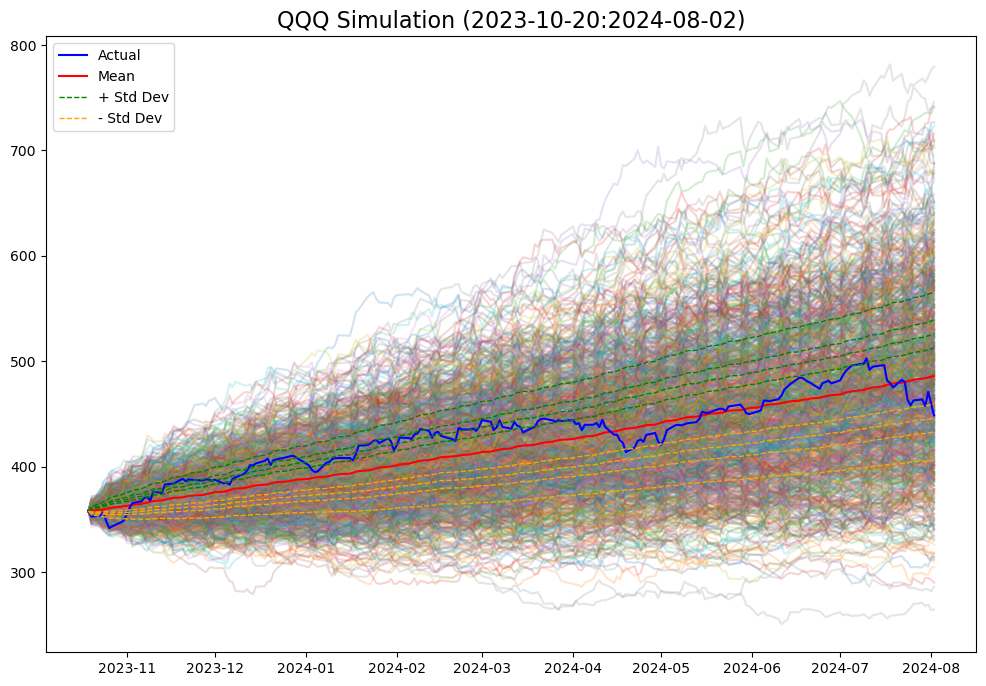

In [11]:
# Simulation dates
last_train_date = train.index[-1].date()
first_test_date = test.index[0].date()
last_test_date = test.index[-1].date()

# Title for the plot
plot_title = f'{ticker} Simulation ({first_test_date}:{last_test_date})'

# Selected indices for plotting
selected_indices = adj_close[last_train_date:last_test_date].index
index = [date.date() for date in selected_indices]

# Convert GBM simulations to DataFrame
gbm_simulations_df = pd.DataFrame(np.transpose(gbm_simulations), index=index)

# Calculate the mean and standard deviation
mean_series = gbm_simulations_df.mean(axis=1)
std_series = gbm_simulations_df.std(axis=1)

# Plotting
ax = gbm_simulations_df.plot(alpha=0.2, legend=False, figsize=(12,8))
line_mean, = ax.plot(index, mean_series, color='red', label='Mean')
line_actual, = ax.plot(index, adj_close[last_train_date:last_test_date], color='blue', label='Actual')

# Plotting fractional standard deviation bands
fractions = [1/3, 1/2, 2/3, 1]
std_lines = []
for fraction in fractions:
    upper_bound = mean_series + fraction * std_series
    lower_bound = mean_series - fraction * std_series
    line_upper, = ax.plot(index, upper_bound, color='green', linestyle='--', linewidth=1, alpha=1)
    line_lower, = ax.plot(index, lower_bound, color='orange', linestyle='--', linewidth=1, alpha=1)
    if fraction == 1:
        std_lines.append(line_upper)
        std_lines.append(line_lower)

# Title
ax.set_title(plot_title, fontsize=16)

# Legend
legend_handles = [line_actual, line_mean] + std_lines
legend_labels = ['Actual', 'Mean', '+ Std Dev', '- Std Dev']
ax.legend(legend_handles, legend_labels, loc='upper left')

plt.show()

Including lines for $\pm \frac{1}{3}$, $\pm \frac{1}{2}$, $\pm \frac{2}{3}$, and $\pm 1$ standard deviations around the simulated mean, we observe that the actual price generally stays within the $\pm \frac{1}{3}$ - $\pm \frac{2}{3}$ standard deviation range without significant deviations.